In [2]:
import matplotlib.pyplot as plt

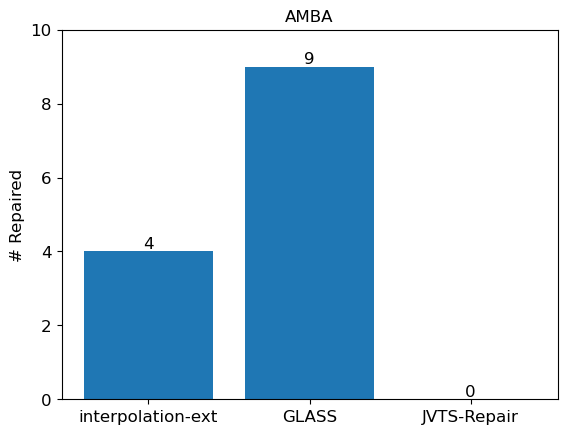

In [10]:
# Sample data
categories = ['interpolation-ext', 'GLASS', 'JVTS-Repair']
values = [4, 9, 0]

# Create a bar chart
bars = plt.bar(categories, values)
plt.ylim(0, 10)

# Add labels and title
plt.title('AMBA', fontsize=12)
plt.ylabel('# Repaired', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Show the chart
plt.show()

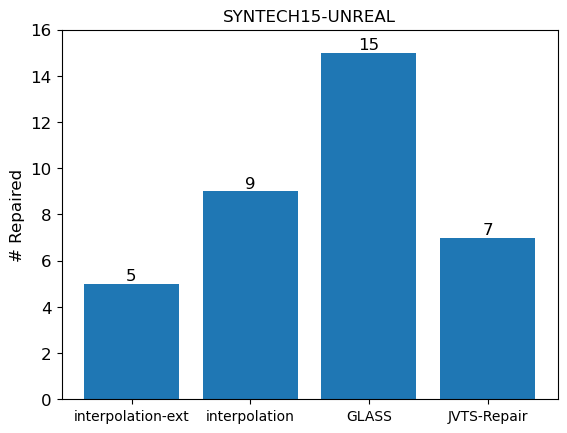

In [13]:
# Sample data
categories = ['interpolation-ext', 'interpolation', 'GLASS', 'JVTS-Repair']
values = [5, 9, 15, 7]

# Create a bar chart
bars = plt.bar(categories, values)
plt.ylim(0, 16)

# Add labels and title
plt.title('SYNTECH15-UNREAL', fontsize=12)
plt.ylabel('# Repaired', fontsize=12)

plt.yticks(fontsize=12)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Show the chart
plt.show()

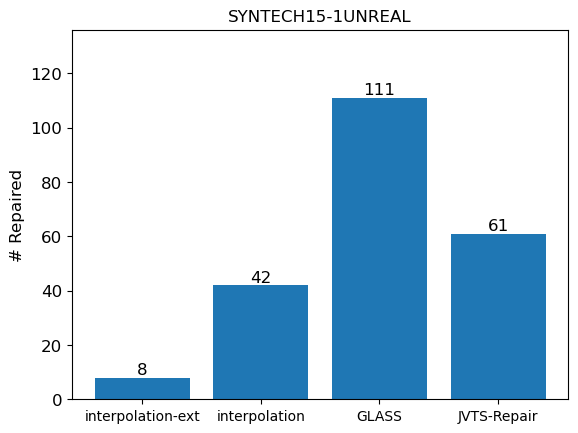

In [14]:
# Sample data
categories = ['interpolation-ext', 'interpolation', 'GLASS', 'JVTS-Repair']
values = [8, 42, 111, 61]

# Create a bar chart
bars = plt.bar(categories, values)
plt.ylim(0, 136)

# Add labels and title
plt.title('SYNTECH15-1UNREAL', fontsize=12)
plt.ylabel('# Repaired', fontsize=12)

plt.yticks(fontsize=12)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Show the chart
plt.show()